# Customer Conversion Prediction

# Problem Statement

You are working for a new-age insurance company and employ mutiple outreach plans to sell term insurance to your customers. Telephonic marketing campaigns still remain one of the most effective way to reach out to people however they incur a lot of cost. Hence, it is important to identify the customers that are most likely to convert beforehand so that they can be specifically targeted via call. We are given the historical marketing data of the insurance company and are required to build a ML model that will predict if a client will subscribe to the insurance. 


In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

In [2]:
df = pd.read_csv('train.csv')
df

,age,job,marital,education_qual,call_type,day,mon,dur,num_calls,prev_outcome,y
0,58,management,married,tertiary,unknown,5,may,261,1,unknown,no
1,44,technician,single,secondary,unknown,5,may,151,1,unknown,no
2,33,entrepreneur,married,secondary,unknown,5,may,76,1,unknown,no
3,47,blue-collar,married,unknown,unknown,5,may,92,1,unknown,no
4,33,unknown,single,unknown,unknown,5,may,198,1,unknown,no
...,...,...,...,...,...,...,...,...,...,...,...
45206,51,technician,married,tertiary,cellular,17,nov,977,3,unknown,yes
45207,71,retired,divorced,primary,cellular,17,nov,456,2,unknown,yes
45208,72,retired,married,secondary,cellular,17,nov,1127,5,success,yes
45209,57,blue-collar,married,secondary,telephone,17,nov,508,4,unknown,no


In [3]:
df.isnull().sum()

age               0
job               0
marital           0
education_qual    0
call_type         0
day               0
mon               0
dur               0
num_calls         0
prev_outcome      0
y                 0
dtype: int64

In [4]:
df.dtypes

age                int64
job               object
marital           object
education_qual    object
call_type         object
day                int64
mon               object
dur                int64
num_calls          int64
prev_outcome      object
y                 object
dtype: object

In [5]:
a =(len(df[df['y'] == 'yes']))/(df.shape[0])
b = (len(df[df['y'] == 'no']))/(df.shape[0])
print('Check for Imbalancing : ','\n'
      '% of yes :', a,'\n'
      '% of no :', b, '\n'
     )

Check for Imbalancing :  
% of yes : 0.11698480458295547 
% of no : 0.8830151954170445 



# Data Cleaning 

In [6]:
df.drop_duplicates(inplace = True)

In [7]:
df.shape

(45205, 11)

# AGE

In [8]:
df.age.unique()

array([58, 44, 33, 47, 35, 28, 42, 43, 41, 29, 53, 57, 51, 45, 60, 56, 32,
       25, 40, 39, 52, 46, 36, 49, 59, 37, 50, 54, 55, 48, 24, 38, 31, 30,
       27, 34, 23, 26, 61, 22, 21, 20, 66, 62, 83, 75, 67, 70, 65, 68, 64,
       69, 72, 71, 19, 76, 85, 63, 90, 82, 73, 74, 78, 80, 94, 79, 77, 86,
       95, 81, 18, 89, 84, 87, 92, 93, 88], dtype=int64)

In [9]:
df.age.describe()

count    45205.000000
mean        40.937087
std         10.619130
min         18.000000
25%         33.000000
50%         39.000000
75%         48.000000
max         95.000000
Name: age, dtype: float64

<AxesSubplot:>

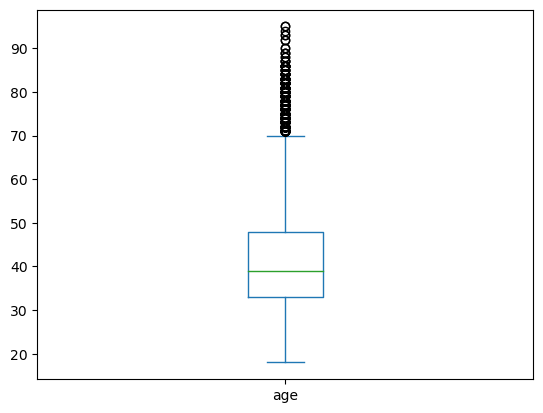

In [10]:
df.age.plot.box()

In [11]:
q1 = df.age.quantile(0.25)
q3 = df.age.quantile(0.75)
iqr = q3 - q1
upper = q3 + (iqr * 1.5)
lower = q1 - (iqr * 1.5)
print('Lower thersold : ', lower,'\n'
      'Upper thersold : ', upper)
print('count of greater than 70 age : ', len(df[df['age'] > 70.5]))

Lower thersold :  10.5 
Upper thersold :  70.5
count of greater than 70 age :  487


In [12]:
print('Age > 70 & yes : ', len(df[(df['age'] > 70) & (df['y'] == 'yes')]))
print('Age > 70 & no : ',len(df[(df['age'] > 70) & (df['y'] == 'no')]))
print('Age < 70 & yes : ',len(df[(df['age'] < 70) & (df['y'] == 'yes')]))
print('Age < 70 & no : ',len(df[(df['age'] < 70) & (df['y'] == 'no')]))

Age > 70 & yes :  218
Age > 70 & no :  269
Age < 70 & yes :  5054
Age < 70 & no :  39597


# JOB

In [13]:
df.job.value_counts()

blue-collar      9730
management       9457
technician       7596
admin.           5170
services         4153
retired          2264
self-employed    1579
entrepreneur     1487
unemployed       1303
housemaid        1240
student           938
unknown           288
Name: job, dtype: int64

In [14]:
len(df[(df['job'] == 'unknown') & (df['education_qual'] == 'unknown') & (df['call_type'] == 'unknown') & (df['prev_outcome'] == 'unknown')])

54

In [15]:
df.groupby(['job', 'y'])['y'].count()

job            y  
admin.         no     4539
               yes     631
blue-collar    no     9022
               yes     708
entrepreneur   no     1364
               yes     123
housemaid      no     1131
               yes     109
management     no     8156
               yes    1301
retired        no     1748
               yes     516
self-employed  no     1392
               yes     187
services       no     3784
               yes     369
student        no      669
               yes     269
technician     no     6756
               yes     840
unemployed     no     1101
               yes     202
unknown        no      254
               yes      34
Name: y, dtype: int64

In [16]:
df.job.unique()

array(['management', 'technician', 'entrepreneur', 'blue-collar',
       'unknown', 'retired', 'admin.', 'services', 'self-employed',
       'unemployed', 'housemaid', 'student'], dtype=object)

In [17]:
for i in['management', 'technician', 'entrepreneur', 'blue-collar',
       'unknown', 'retired', 'admin.', 'services', 'self-employed',
       'unemployed', 'housemaid', 'student'] :
    print('Conversion % of ', i, ' : ', ((  (len(df[(df['job'] == i) & (df['y'] == 'yes')]))  /len(df[df['job'] == i]) )*100 ))

Conversion % of  management  :  13.757005392830706
Conversion % of  technician  :  11.058451816745656
Conversion % of  entrepreneur  :  8.271687962340282
Conversion % of  blue-collar  :  7.276464542651594
Conversion % of  unknown  :  11.805555555555555
Conversion % of  retired  :  22.791519434628977
Conversion % of  admin.  :  12.205029013539653
Conversion % of  services  :  8.885143269925354
Conversion % of  self-employed  :  11.842938568714375
Conversion % of  unemployed  :  15.502686108979278
Conversion % of  housemaid  :  8.790322580645162
Conversion % of  student  :  28.678038379530918


# Marital

In [18]:
df.marital.value_counts()

married     27210
single      12788
divorced     5207
Name: marital, dtype: int64

In [19]:
df.marital.unique()

array(['married', 'single', 'divorced'], dtype=object)

In [20]:
df.groupby(['marital', 'y'])['y'].count()

marital   y  
divorced  no      4585
          yes      622
married   no     24455
          yes     2755
single    no     10876
          yes     1912
Name: y, dtype: int64

In [21]:
for i in['married', 'single', 'divorced'] :
    print('Conversion % of ', i, ' : ', ((  (len(df[(df['marital'] == i) & (df['y'] == 'yes')]))  /len(df[df['marital'] == i]) )*100 ))

Conversion % of  married  :  10.124954061006983
Conversion % of  single  :  14.95151704723178
Conversion % of  divorced  :  11.945458037257538


# Education

In [22]:
df.education_qual.value_counts()

secondary    23199
tertiary     13299
primary       6850
unknown       1857
Name: education_qual, dtype: int64

In [23]:
df.education_qual.unique()

array(['tertiary', 'secondary', 'unknown', 'primary'], dtype=object)

In [24]:
df.groupby(['education_qual', 'y'])['y'].count()

education_qual  y  
primary         no      6259
                yes      591
secondary       no     20749
                yes     2450
tertiary        no     11303
                yes     1996
unknown         no      1605
                yes      252
Name: y, dtype: int64

In [25]:
for i in ['tertiary', 'secondary', 'unknown', 'primary'] :
    print('Conversion % of ', i, ' : ', ((  (len(df[(df['education_qual'] == i) & (df['y'] == 'yes')]))  /len(df[df['education_qual'] == i]) )*100 ))

Conversion % of  tertiary  :  15.008647266711783
Conversion % of  secondary  :  10.560800034484245
Conversion % of  unknown  :  13.5702746365105
Conversion % of  primary  :  8.627737226277372


# call type

In [26]:
df.call_type.value_counts()

cellular     29282
unknown      13017
telephone     2906
Name: call_type, dtype: int64

In [27]:
df.groupby(['call_type', 'y'])['y'].count()

call_type  y  
cellular   no     24913
           yes     4369
telephone  no      2516
           yes      390
unknown    no     12487
           yes      530
Name: y, dtype: int64

# Month

In [28]:
df['mon'].value_counts()

may    13765
jul     6894
aug     6245
jun     5339
nov     3970
apr     2932
feb     2649
jan     1403
oct      738
sep      579
mar      477
dec      214
Name: mon, dtype: int64

In [29]:
df['mon'].unique()

array(['may', 'jun', 'jul', 'aug', 'oct', 'nov', 'dec', 'jan', 'feb',
       'mar', 'apr', 'sep'], dtype=object)

In [30]:
df.groupby(['mon', 'y'])['y'].count()

mon  y  
apr  no      2355
     yes      577
aug  no      5557
     yes      688
dec  no       114
     yes      100
feb  no      2208
     yes      441
jan  no      1261
     yes      142
jul  no      6267
     yes      627
jun  no      4793
     yes      546
mar  no       229
     yes      248
may  no     12840
     yes      925
nov  no      3567
     yes      403
oct  no       415
     yes      323
sep  no       310
     yes      269
Name: y, dtype: int64

In [31]:
df.shape[0]

45205

In [32]:
for i in['may', 'jun', 'jul', 'aug', 'oct', 'nov', 'dec', 'jan', 'feb', 'mar', 'apr', 'sep'] :
    print('Conversion % of ', i, ' : ', ((  (len(df[(df['mon'] == i) & (df['y'] == 'yes')]))  /len(df[df['mon'] == i]) )*100 ))

Conversion % of  may  :  6.719941881583727
Conversion % of  jun  :  10.226634201161266
Conversion % of  jul  :  9.094865100087032
Conversion % of  aug  :  11.016813450760608
Conversion % of  oct  :  43.766937669376695
Conversion % of  nov  :  10.151133501259446
Conversion % of  dec  :  46.728971962616825
Conversion % of  jan  :  10.121168923734853
Conversion % of  feb  :  16.64779161947905
Conversion % of  mar  :  51.99161425576519
Conversion % of  apr  :  19.679399727148706
Conversion % of  sep  :  46.45941278065631


# call duration

In [33]:
df.dur.describe()

count    45205.000000
mean       258.183055
std        257.538504
min          0.000000
25%        103.000000
50%        180.000000
75%        319.000000
max       4918.000000
Name: dur, dtype: float64

In [34]:
q1 = df.dur.quantile(0.25)
q3 = df.dur.quantile(0.75)
iqr = q3 - q1
upper = q3 + (iqr * 1.5)
lower = q1 - (iqr * 1.5)
print('Lower thersold : ', lower,'\n'
      'Upper thersold : ', upper)
print('count of greater than 643 duration : ', len(df[df['dur'] > 643]))

Lower thersold :  -221.0 
Upper thersold :  643.0
count of greater than 643 duration :  3235


<AxesSubplot:>

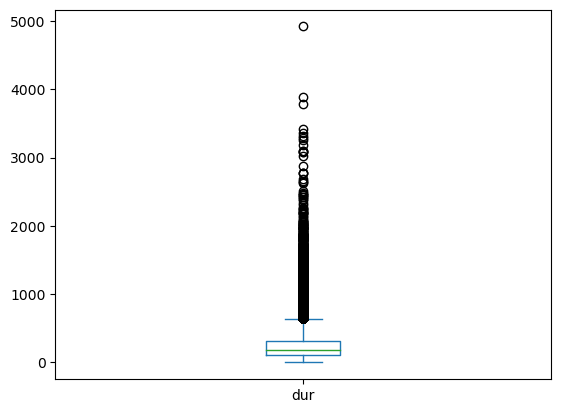

In [35]:
df.dur.plot.box()

In [36]:
print('Duration > 643 & yes : ', len(df[(df['dur'] > 643) & (df['y'] == 'yes')]))
print('Duration > 643 & no : ',len(df[(df['dur'] > 643) & (df['y'] == 'no')]))
print('Duration < 643 & yes : ',len(df[(df['dur'] < 643) & (df['y'] == 'yes')]))
print('Duration < 643 & no : ',len(df[(df['dur'] < 643) & (df['y'] == 'no')]))

Duration > 643 & yes :  1651
Duration > 643 & no :  1584
Duration < 643 & yes :  3636
Duration < 643 & no :  38322


# Number of calls

In [37]:
q1 = df.num_calls.quantile(0.25)
q3 = df.num_calls.quantile(0.75)
iqr = q3 - q1
upper = q3 + (iqr * 1.5)
lower = q1 - (iqr * 1.5)
print('Lower thersold : ', lower,'\n'
      'Upper thersold : ', upper)
print('count of greater than 6 calls : ', len(df[df['num_calls'] > 6]))

Lower thersold :  -2.0 
Upper thersold :  6.0
count of greater than 6 calls :  3064


<AxesSubplot:>

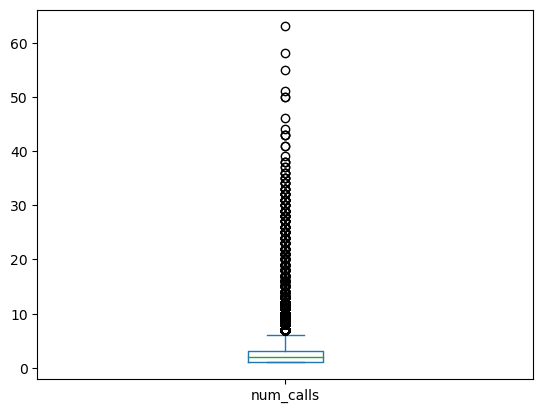

In [38]:
df.num_calls.plot.box()

In [39]:
print('Calls > 6 & yes : ', len(df[(df['num_calls'] > 6) & (df['y'] == 'yes')]))
print('Calls > 6 & no : ',len(df[(df['num_calls'] > 6) & (df['y'] == 'no')]))
print('Calls < 6 & yes : ',len(df[(df['num_calls'] < 6) & (df['y'] == 'yes')]))
print('Calls < 6 & no : ',len(df[(df['num_calls'] < 6) & (df['y'] == 'no')]))

Calls > 6 & yes :  161
Calls > 6 & no :  2903
Calls < 6 & yes :  5036
Calls < 6 & no :  35814


In [40]:
'''df.num_calls = df.num_calls.clip(1.0,6.0)
df.dur = df.dur.clip(0,643.0)'''

'df.num_calls = df.num_calls.clip(1.0,6.0)\ndf.dur = df.dur.clip(0,643.0)'

# Previous Outcome

In [41]:
df.prev_outcome.value_counts()

unknown    36953
failure     4901
other       1840
success     1511
Name: prev_outcome, dtype: int64

In [42]:
df.prev_outcome.unique()

array(['unknown', 'failure', 'other', 'success'], dtype=object)

In [43]:
for i in ['unknown', 'failure', 'other', 'success'] :
    print('Conversion % of ', i, ' : ', ((  (len(df[(df['prev_outcome'] == i) & (df['y'] == 'yes')]))  /len(df[df['prev_outcome'] == i]) )*100 ))

Conversion % of  unknown  :  9.162990826184613
Conversion % of  failure  :  12.609671495613139
Conversion % of  other  :  16.684782608695652
Conversion % of  success  :  64.72534745201854


# Target

In [44]:
df.y.value_counts()

no     39916
yes     5289
Name: y, dtype: int64

In [45]:
df.to_csv('cleaned.csv')

In [46]:
df.columns

Index(['age', 'job', 'marital', 'education_qual', 'call_type', 'day', 'mon',
       'dur', 'num_calls', 'prev_outcome', 'y'],
      dtype='object')

# EDA

In [47]:
df2 = df[(df['y'] == 'yes')]

<AxesSubplot:xlabel='age', ylabel='y'>

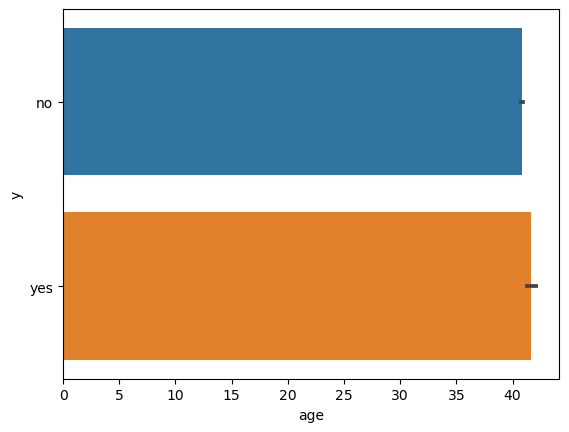

In [48]:
sns.barplot(data = df, x = 'age', y = 'y')

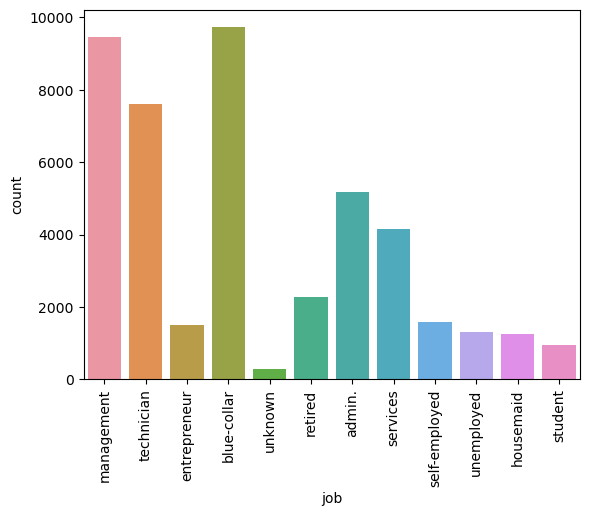

In [49]:
plot = sns.countplot(data = df, x = 'job')
plot.tick_params(axis='x',rotation=90)

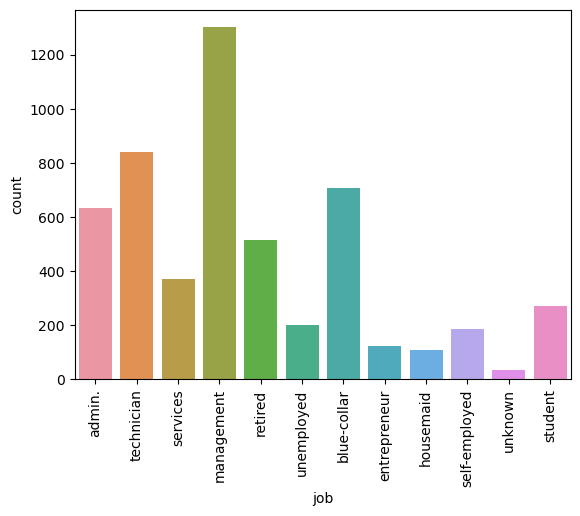

In [50]:
plot = sns.countplot(data = df2, x = 'job')
plot.tick_params(axis='x',rotation=90)

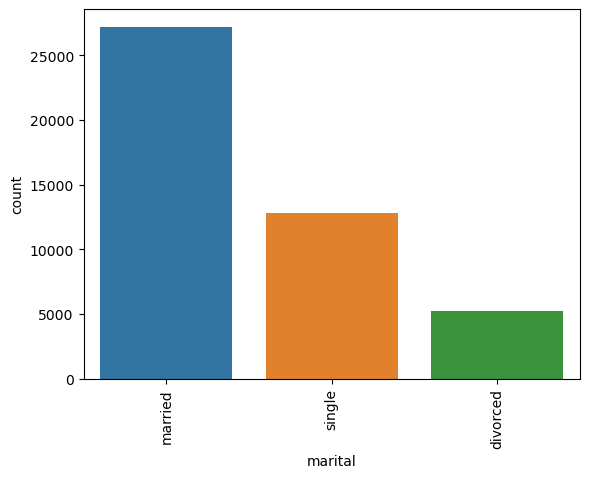

In [51]:
plot = sns.countplot(data = df, x = 'marital')
plot.tick_params(axis='x',rotation=90)

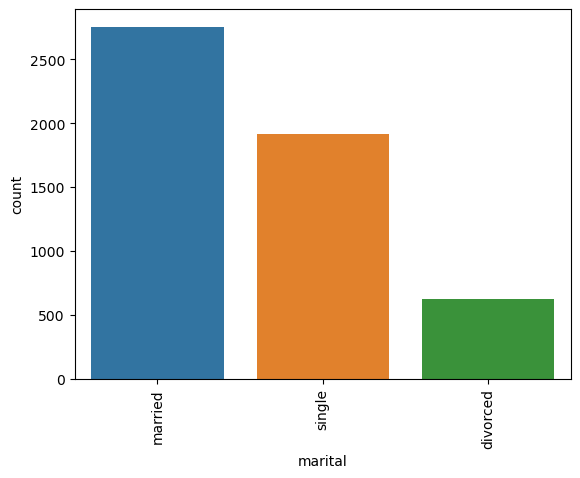

In [52]:
plot = sns.countplot(data = df2, x = 'marital')
plot.tick_params(axis='x',rotation=90)

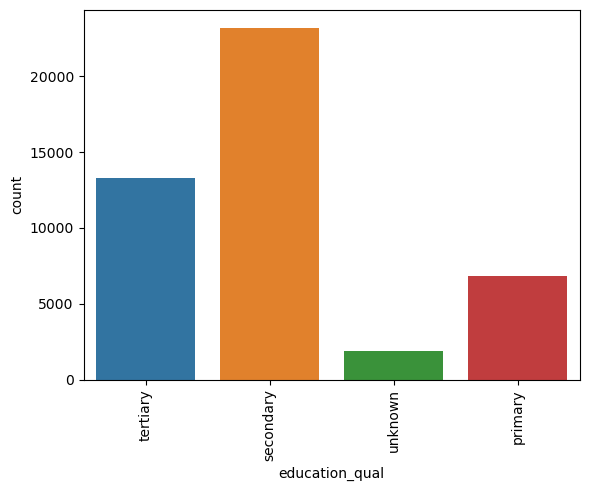

In [53]:
plot = sns.countplot(data = df, x = 'education_qual')
plot.tick_params(axis='x',rotation=90)

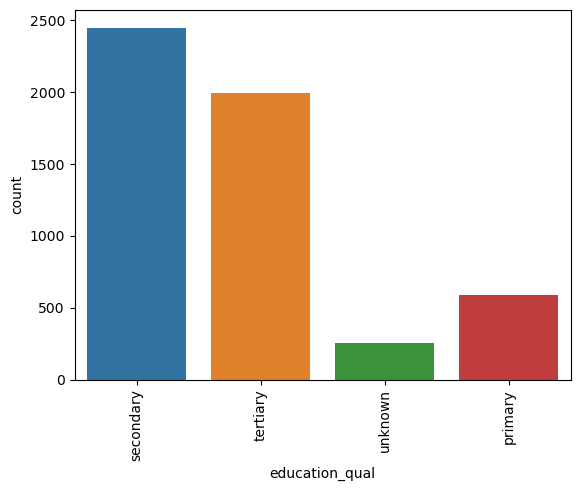

In [54]:
plot = sns.countplot(data = df2, x = 'education_qual')
plot.tick_params(axis='x',rotation=90)

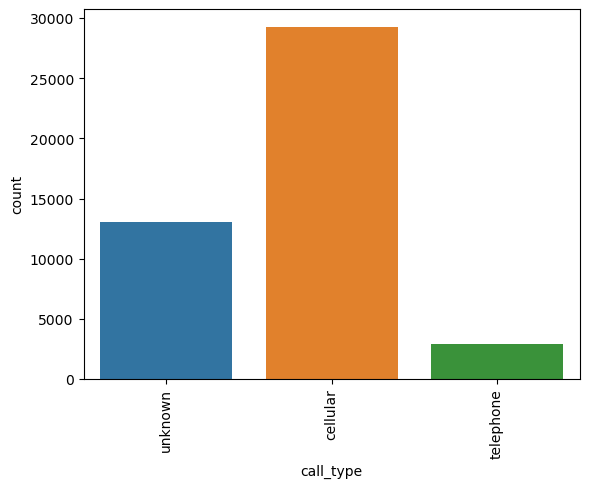

In [55]:
plot = sns.countplot(data = df, x = 'call_type')
plot.tick_params(axis='x',rotation=90)

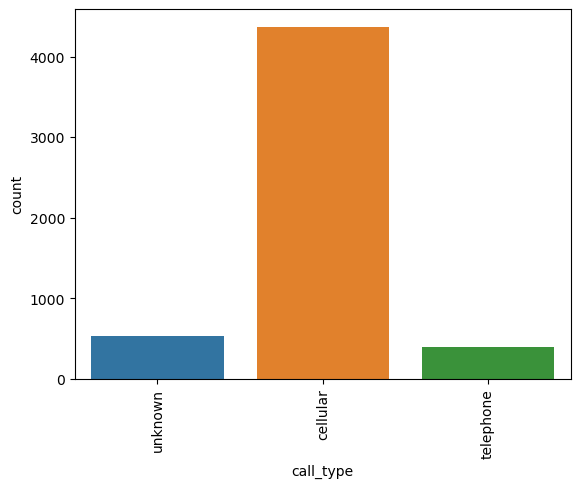

In [56]:
plot = sns.countplot(data = df2, x = 'call_type')
plot.tick_params(axis='x',rotation=90)

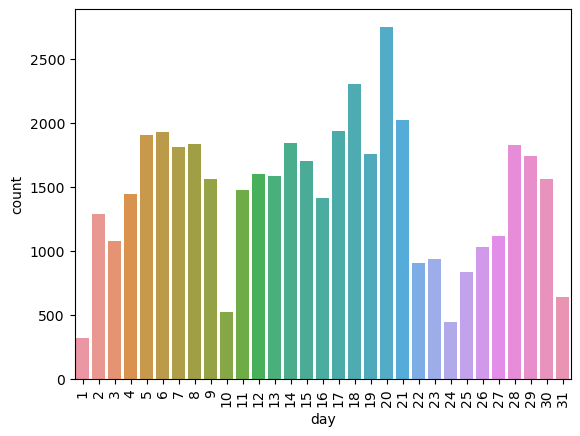

In [57]:
plot = sns.countplot(data = df, x = 'day')
plot.tick_params(axis='x',rotation=90)

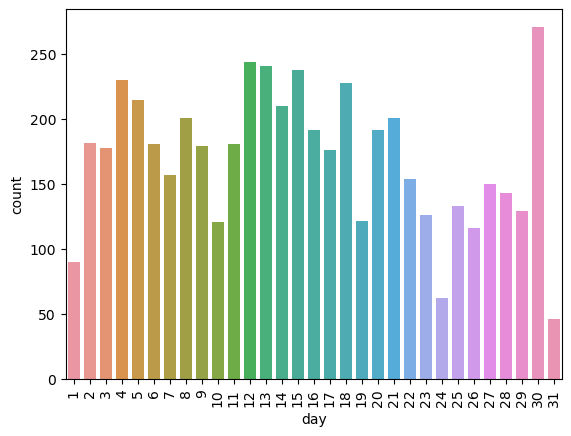

In [58]:
plot = sns.countplot(data = df2, x = 'day')
plot.tick_params(axis='x',rotation=90)

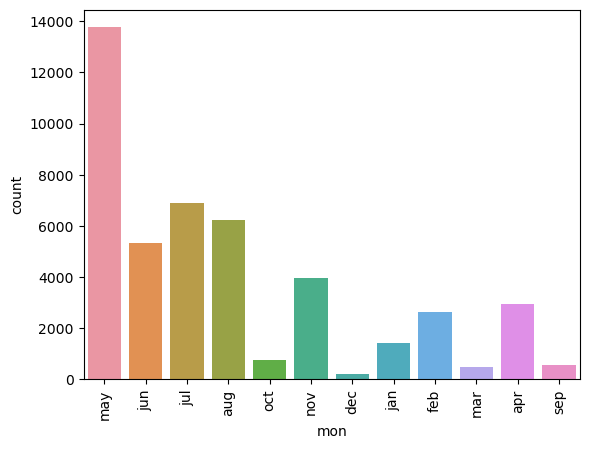

In [59]:
plot = sns.countplot(data = df, x = 'mon')
plot.tick_params(axis='x',rotation=90)

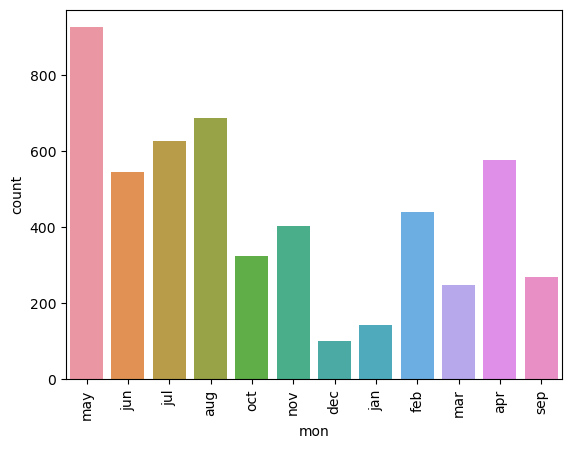

In [60]:
plot = sns.countplot(data = df2, x = 'mon')
plot.tick_params(axis='x',rotation=90)

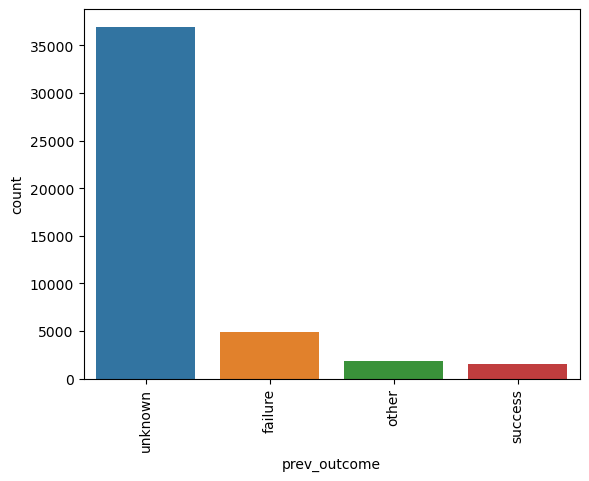

In [61]:
plot = sns.countplot(data = df, x = 'prev_outcome')
plot.tick_params(axis='x',rotation=90)

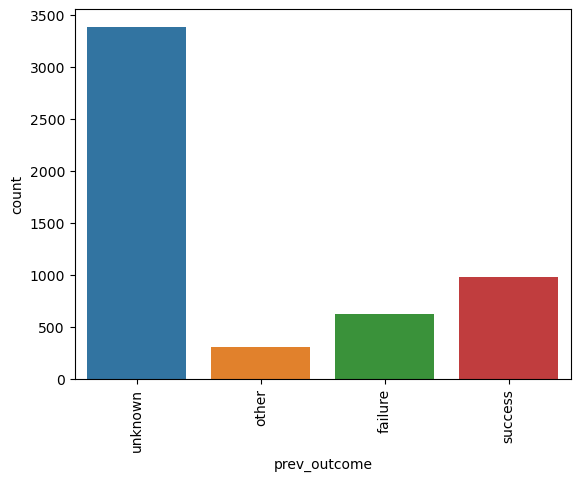

In [62]:
plot = sns.countplot(data = df2, x = 'prev_outcome')
plot.tick_params(axis='x',rotation=90)

<AxesSubplot:ylabel='Frequency'>

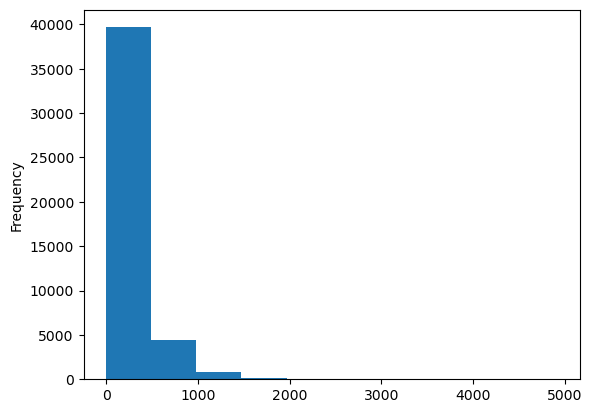

In [63]:
df.dur.plot.hist()

<AxesSubplot:ylabel='Density'>

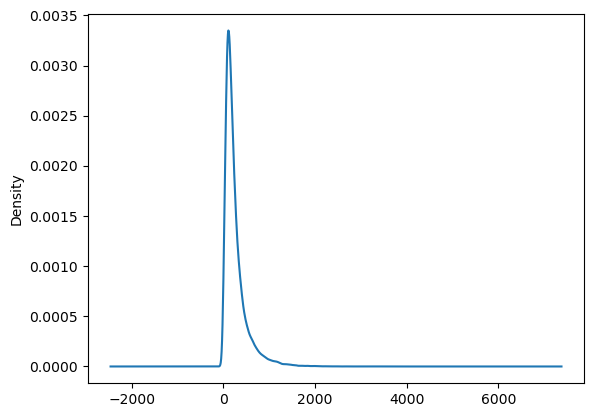

In [64]:
df.dur.plot.kde()

# Encoding

1. Encoding JOB, Martial, Education, month by highest conversion percentage.
2. For unknown in education - student
3. For unknown in call type - unknown
4. For unknown in previous outcome - unknown
5. For unknown in edu qual  - secondary

In [65]:
df['job'] = df['job'].replace({'management' : 3, 'technician' : 6, 'entrepreneur' : 9, 'blue-collar' : 10,
                               'unknown' : 0, 'retired' : 1, 'admin.' : 4, 'services' : 7, 'self-employed' : 5,
                               'unemployed' : 2, 'housemaid' : 8, 'student' : 0})


df['marital'] = df['marital'].replace({'married' : 2, 'single' : 0, 'divorced' : 1})


df['education_qual'] = df['education_qual'].replace({'tertiary' : 0, 'secondary' : 1, 'primary' : 2, 'unknown' : 1})


df['call_type'] = df['call_type'].replace({'cellular' : 0, 'telephone' : 1, 'unknown' : 2})


df['mon'] = df['mon'].replace({'may' : 11,'jul' : 10, 'aug' : 6, 'jun' : 7, 'nov' : 8, 'apr' : 4, 
                               'feb' : 5, 'jan' : 9, 'oct' : 3, 'sep' : 2, 'mar' : 0, 'dec' : 1})


df['prev_outcome'] = df['prev_outcome'].replace({'success' : 0, 'failure' : 2, 'unknown' : 3, 'other' : 1})


df['y'] = df['y'].replace({'yes' : 0, 'no' : 1})

In [66]:
df.isnull().sum()

age               0
job               0
marital           0
education_qual    0
call_type         0
day               0
mon               0
dur               0
num_calls         0
prev_outcome      0
y                 0
dtype: int64

In [67]:
df.shape

(45205, 11)

In [68]:
df.isnull().sum()

age               0
job               0
marital           0
education_qual    0
call_type         0
day               0
mon               0
dur               0
num_calls         0
prev_outcome      0
y                 0
dtype: int64

# Features and Target Variable

In [69]:
X = df[['age', 'job', 'marital', 'education_qual', 'call_type', 'day', 'mon',
       'dur', 'num_calls', 'prev_outcome']]

y = df['y']

In [70]:
X.shape, y.shape

((45205, 10), (45205,))

# Spliting

In [71]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size = 0.25) 

In [72]:
X_train

,age,job,marital,education_qual,call_type,day,mon,dur,num_calls,prev_outcome
12798,30,3,0,0,0,7,10,240,1,3
18194,46,3,2,0,0,30,10,239,4,3
18308,47,3,2,1,1,31,10,921,4,3
13872,34,5,2,0,0,10,10,58,1,3
26846,56,6,0,1,0,20,8,367,8,3
...,...,...,...,...,...,...,...,...,...,...
36239,34,7,0,1,0,11,11,610,2,3
22158,56,3,2,0,0,21,6,321,2,3
9015,57,3,2,0,2,5,7,21,1,3
42187,42,3,2,0,0,10,8,193,2,3


# Balancing the data

In [73]:
from imblearn.combine import SMOTEENN
smt = SMOTEENN()
X_train, y_train = smt.fit_resample(X_train, y_train)

In [74]:
X_train, y_train

(       age  job  marital  education_qual  call_type  day  mon  dur  num_calls  \
 0       55    6        2               1          1   28   10  596          4   
 1       24    0        0               1          0   15    2  216          1   
 2       37    3        2               0          0    9    8  268          1   
 3       35    7        0               2          0   11   10  614          2   
 4       28    5        0               0          0   25   11  426          1   
 ...    ...  ...      ...             ...        ...  ...  ...  ...        ...   
 51530   36   10        2               1          2   12   11  325          4   
 51531   51    8        1               1          0   18    8   91          1   
 51532   56    3        2               0          0   21    6  321          2   
 51533   57    3        2               0          2    5    7   21          1   
 51534   44   10        2               2          2   29   11   23          1   
 
        prev_o

# Models

# Logistic Regression

In [75]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import roc_auc_score
log = LogisticRegression()
log.fit(X_train, y_train)
y_predict_log = log.predict(X_test)
roc_auc_score(y_test,y_predict_log)

0.8094134120295288

# Decision Tree

In [76]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import cross_val_score

for depth in range(1,15) :
    dt = DecisionTreeClassifier(max_depth = depth)
    dt.fit(X_train, y_train)
    y_predict_dt = dt.predict(X_test)
    auroc = roc_auc_score(y_test, y_predict_dt)
    print('Depth : ', depth, 'Train Score : ', dt.score(X_train, y_train), 'AUROC : ', auroc, 'Cross Validation : ', np.mean(cross_val_score(dt, X_train, y_train, cv=10, scoring = 'roc_auc')))


Depth :  1 Train Score :  0.7832346948675657 AUROC :  0.711333962933722 Cross Validation :  0.7756877065619873
Depth :  2 Train Score :  0.8421655185796061 AUROC :  0.7387201541865922 Cross Validation :  0.8588030493007903
Depth :  3 Train Score :  0.8700882895119821 AUROC :  0.7869293186868402 Cross Validation :  0.9138694793630178
Depth :  4 Train Score :  0.8967691859901038 AUROC :  0.7980468902017765 Cross Validation :  0.9417557819085325
Depth :  5 Train Score :  0.9083341418453478 AUROC :  0.8044002285672892 Cross Validation :  0.9588553580405905
Depth :  6 Train Score :  0.9227903366644028 AUROC :  0.8068933921628237 Cross Validation :  0.9691453103538624
Depth :  7 Train Score :  0.9327059280100902 AUROC :  0.8134467461720181 Cross Validation :  0.9737255449905653
Depth :  8 Train Score :  0.9434364994663821 AUROC :  0.8207148546004561 Cross Validation :  0.9764908711617541
Depth :  9 Train Score :  0.9503250218298244 AUROC :  0.819258258303385 Cross Validation :  0.97659876442

In [77]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import cross_val_score
from sklearn.metrics import roc_auc_score

dt = DecisionTreeClassifier(max_depth = 9)
dt.fit(X_train, y_train)
y_predict_dt = dt.predict(X_test)
roc_auc_score(y_test, y_predict_dt)

0.8192082832908912

# Random Forest

In [78]:
from sklearn.ensemble import RandomForestClassifier

rf = RandomForestClassifier(n_estimators = 100, max_depth = 3, max_features = 'sqrt')
rf.fit(X_train, y_train)
y_predict_rf = rf.predict(X_test)
roc_auc_score(y_test, y_predict_rf)

0.7982603917778968

# XGBoost

In [79]:
import xgboost as xgb

for lr in [0.1,0.11,0.12,0.13,0.14,0.15,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9,1]:
    xg = xgb.XGBClassifier(learning_rate = lr, n_estimator = 100, verbosity = 0)
    xg.fit(X_train, y_train)
    y_predict_xg = xg.predict(X_test)
    auroc = roc_auc_score(y_test, y_predict_xg)
    print('Learning Rate : ', lr, 'Train Score : ', xg.score(X_train, y_train), 'AUROC : ', auroc, 'Cross Validation : ', np.mean(cross_val_score(xg, X_train, y_train, cv=10, scoring = 'roc_auc')))


Learning Rate :  0.1 Train Score :  0.9683516057048608 AUROC :  0.8485858073276392 Cross Validation :  0.9921673919904196
Learning Rate :  0.11 Train Score :  0.9694964587173766 AUROC :  0.847614897254534 Cross Validation :  0.9924740672990179
Learning Rate :  0.12 Train Score :  0.970097991656156 AUROC :  0.847122352470642 Cross Validation :  0.9926492030589842
Learning Rate :  0.13 Train Score :  0.9709129717667605 AUROC :  0.845894477587729 Cross Validation :  0.9928449992244666
Learning Rate :  0.14 Train Score :  0.9725235276996216 AUROC :  0.8451448524003227 Cross Validation :  0.9929147262541143
Learning Rate :  0.15 Train Score :  0.9741534879208305 AUROC :  0.8448878875905147 Cross Validation :  0.9931104469932427
Learning Rate :  0.2 Train Score :  0.9784030270689823 AUROC :  0.8439170931111161 Cross Validation :  0.9937718189917149
Learning Rate :  0.3 Train Score :  0.9847288250703405 AUROC :  0.84503095406807 Cross Validation :  0.9944013668981917
Learning Rate :  0.4 Trai

In [85]:
import xgboost as xgb
xg = xgb.XGBClassifier(learning_rate = 0.9, n_estimator = 100, verbosity = 0)
xg.fit(X_train, y_train)
y_predict_xg = xg.predict(X_test)
roc_auc_score(y_test, y_predict_xg)

0.8429108498950216

# Voting Classifier

In [86]:
from sklearn.ensemble import VotingClassifier
from sklearn.neighbors import KNeighborsClassifier

model1 =DecisionTreeClassifier(max_depth = 9)
model2 = RandomForestClassifier(n_estimators = 100, max_depth = 3, max_features = 'sqrt')
model3 = xgb.XGBClassifier(learning_rate = 0.5, n_estimator = 100, verbosity = 0)

model = VotingClassifier(estimators=[('Decision Tree : ', model1), ('Random Forest : ', model2),('XGBoost : ',model3)]) 

model.fit(X_train, y_train)
y_predict_voting = model.predict(X_test)
roc_auc_score(y_test, y_predict_voting)

0.8317515490519968

# AUROC

In [87]:
AUROC = pd.Series({'XGBoost' : (roc_auc_score(y_test, y_predict_xg)),
                   'Voting Classifier' : (roc_auc_score(y_test, y_predict_voting)),
                   'Decision Tree' : (roc_auc_score(y_test, y_predict_dt)),
                   'Random Forest' : (roc_auc_score(y_test, y_predict_rf)),
                   'Logistic Regression' : (roc_auc_score(y_test,y_predict_log))})
AUROC

XGBoost                0.842911
Voting Classifier      0.831752
Decision Tree          0.819208
Random Forest          0.798260
Logistic Regression    0.809413
dtype: float64

# Important Features

In [88]:
importances = list((xg.feature_importances_)*100)


feature_importances = [(feature, round(importance, 2)) for feature, importance in zip(X.columns, importances)]


feature_importances = sorted(feature_importances, key = lambda x: x[1], reverse = True)

 
[print('{:15} - {}'.format(*pair)) for pair in feature_importances];


call_type       - 37.709999084472656
prev_outcome    - 17.690000534057617
mon             - 14.170000076293945
dur             - 10.920000076293945
job             - 4.369999885559082
education_qual  - 4.25
marital         - 3.690000057220459
num_calls       - 2.809999942779541
day             - 2.549999952316284
age             - 1.850000023841858


In [89]:
print(roc_auc_score(y_test, y_predict_xg))
print(roc_auc_score(y_test, y_predict_voting))
print(roc_auc_score(y_test, y_predict_dt))
print(roc_auc_score(y_test, y_predict_rf))
print(roc_auc_score(y_test,y_predict_log))

0.8429108498950216
0.8317515490519968
0.8192082832908912
0.7982603917778968
0.8094134120295288
